# Data Import From Kaggle.com
- Refence https://www.kaggle.com/hassanamin/customer-churn


## Goal = Churn Prediction  (Detail By Kaggle)
- A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.


In [408]:
import pandas as pd
import os
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import statsmodels.formula.api as smf
import featuretools as ft
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('/data/dev_001/Data_source/customer_churn.csv')

In [3]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


### <u>Explain Variable</u>
- Name : Name of the latest contact at Company

- Age: Customer Age

- Total_Purchase: Total Ads Purchased

- Account_Manager: Binary 0=No manager, 1= Account manager assigned

- Years: Totaly Years as a customer

- Num_sites: Number of websites that use the service.

- Onboard_date: Date that the name of the latest contact was onboarded

- Location: Client HQ Address

- Company: Name of Client Company

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
profile = ProfileReport(data)

## 1.Cleansing Data

In [6]:
data['Age']= data['Age'].astype(int)
data['Years'] = round(data['Years']).astype(int)
data['Num_Sites'] = data['Num_Sites'].astype(int)
data['Onboard_date'] = pd.to_datetime(data['Onboard_date'])

In [7]:
pd.crosstab(data['Churn'] , columns='N')

col_0,N
Churn,
0,750
1,150


# 2. Data Exploration

In [16]:
currentDate = pd.to_datetime(data['Onboard_date']).max() # Defind Current Date From Data

In [28]:
data['Day_Missing'] = (currentDate - data['Onboard_date']).dt.days

In [47]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,Day_Missing
0,Cameron Williams,42,11066.80,0,7,8,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,1215
1,Kevin Mueller,41,11916.22,0,6,11,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,1233
2,Eric Lozano,38,12884.75,0,7,12,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,181
3,Phillip White,42,8010.76,0,7,10,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,980
4,Cynthia Norton,37,9191.58,0,6,9,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,343


In [65]:
data.groupby('Churn').mean()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Day_Missing
Churn,,,,,,
0,41.581333,10036.952853,0.465333,5.168,8.173333,2067.028
1,42.993333,10192.179933,0.560000,5.920,10.660000,2186.940


In [55]:
data.corr()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Day_Missing
Age,1.000000,-0.037208,-0.014749,-0.004302,-0.006070,0.085926,-0.002598
Total_Purchase,-0.037208,1.000000,0.015856,0.002017,-0.003390,0.024031,0.020518
Account_Manager,-0.014749,0.015856,1.000000,0.017211,0.033401,0.070611,-0.021641
Years,-0.004302,0.002017,0.017211,1.000000,0.072166,0.217188,0.033712
Num_Sites,-0.006070,-0.003390,0.033401,0.072166,1.000000,0.525398,0.031837
Churn,0.085926,0.024031,0.070611,0.217188,0.525398,1.000000,0.038155
Day_Missing,-0.002598,0.020518,-0.021641,0.033712,0.031837,0.038155,1.000000


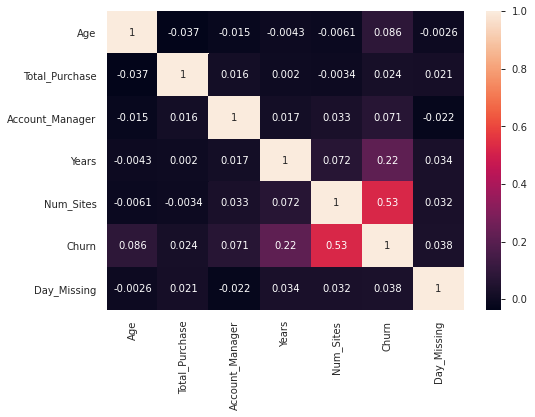

In [57]:
sns.heatmap(data.corr() ,annot=True)

In [97]:
data['DATE'] = data['Onboard_date'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [115]:
data['MONTH'] = pd.to_datetime(data['DATE']).dt.month

In [116]:
pd.crosstab(data['MONTH'] , columns='N').sort_values(by='N')

col_0,N
MONTH,
5,67
12,67
7,68
11,69
9,70
10,70
4,71
6,72
2,74


# 3. Data Preparation
### ***I look at the variables Tell to Identity Not Should be for Train Model Because  may be a problem Overfiting Model 
- ex : Onboard_date , Location  

In [127]:
data['Location'].unique()

array(['10265 Elizabeth Mission Barkerburgh, AK 89518',
       '6157 Frank Gardens Suite 019 Carloshaven, RI 17756',
       '1331 Keith Court Alyssahaven, DE 90114',
       '13120 Daniel Mount Angelabury, WY 30645-4695',
       '765 Tricia Row Karenshire, MH 71730',
       '6187 Olson Mountains East Vincentborough, PR 74359',
       '4846 Savannah Road West Justin, IA 87713-3460',
       '25271 Roy Expressway Suite 147 Brownport, FM 59852-6150',
       '3725 Caroline Stravenue South Christineview, MA 82059',
       '363 Sandra Lodge Suite 144 South Ann, WI 51655-7561',
       'Unit 8120 Box 9160 DPO AA 43432',
       'Unit 1895 Box 0949 DPO AA 40249',
       '897 Kelley Overpass Suite 349 West Rebekahport, AZ 44793',
       '11488 Weaver Cape Hernandezberg, WI 63417-8544',
       '1774 Peter Row Apt. 712 New Autumn, MT 18782',
       '45408 David Path East Kimberlyshire, HI 54903-6698',
       '28216 Wright Mount Apt. 356 Alichester, DE 40999-2369',
       'Unit 4948 Box 4814 DPO AP 42

In [324]:
data.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,Day_Missing,DATE,MONTH,Address
0,Cameron Williams,42,11066.80,0,7,8,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,1215,2013-08-30,8,Elizabeth Mission Barkerburgh
1,Kevin Mueller,41,11916.22,0,6,11,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,1233,2013-08-13,8,Frank Gardens Suite 019 Carloshaven


## Split Feature Address For Feature

In [336]:
data['HQ_ADDRESS'] = data['Location'].str.extract('(?P<House_Number>\d+)(?P<Address>.*)(\s\w{2}\s\d+)(-?\d{1,4})', expand=True)\
                                     .drop(columns=[2,'House_Number',3]).apply(lambda x : x.str.replace(',' ,''))

In [340]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,Day_Missing,DATE,MONTH,HQ_ADDRESS
0,Cameron Williams,42,11066.80,0,7,8,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,1215,2013-08-30,8,Elizabeth Mission Barkerburgh
1,Kevin Mueller,41,11916.22,0,6,11,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,1233,2013-08-13,8,Frank Gardens Suite 019 Carloshaven
2,Eric Lozano,38,12884.75,0,7,12,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,181,2016-06-29,6,Keith Court Alyssahaven
3,Phillip White,42,8010.76,0,7,10,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,980,2014-04-22,4,Daniel Mount Angelabury
4,Cynthia Norton,37,9191.58,0,6,9,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,343,2016-01-19,1,Tricia Row Karenshire


In [379]:
mainData_prep= pd.concat([data[['Names' , 'Churn']],
                            pd.get_dummies(data.iloc[:,1:].drop(columns=['Churn','Onboard_date' , 'Location' , 'Company' , 'DATE']))],axis=1)

In [380]:
mainData_prep

,Names,Churn,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Day_Missing,MONTH,HQ_ADDRESS_ Aaron Station Apt. 788 Millsport,...,HQ_ADDRESS_ Wright Mount Apt. 356 Alichester,HQ_ADDRESS_ Wright Plains Kimberlyborough,HQ_ADDRESS_ Wright Summit Nicholasmouth,HQ_ADDRESS_ Wright Views Stephenstad,HQ_ADDRESS_ York Cliff Suite 810 Lake Kristen,HQ_ADDRESS_ Young Village Joneston,HQ_ADDRESS_ Yvette Forks Webbmouth,HQ_ADDRESS_ Zachary Road Apt. 706 Port Michaelview,HQ_ADDRESS_ Zhang View Estradabury,HQ_ADDRESS_ Zimmerman Haven Suite 223 Lake Jennifer
0,Cameron Williams,1,42,11066.80,0,7,8,1215,8,0,...,0,0,0,0,0,0,0,0,0,0
1,Kevin Mueller,1,41,11916.22,0,6,11,1233,8,0,...,0,0,0,0,0,0,0,0,0,0
2,Eric Lozano,1,38,12884.75,0,7,12,181,6,0,...,0,0,0,0,0,0,0,0,0,0
3,Phillip White,1,42,8010.76,0,7,10,980,4,0,...,0,0,0,0,0,0,0,0,0,0
4,Cynthia Norton,1,37,9191.58,0,6,9,343,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,0,42,12800.82,1,4,8,3314,12,0,...,0,0,0,0,0,0,0,0,0,0
896,Natalie Hodges,0,52,9893.92,0,7,7,2921,12,0,...,0,0,0,0,0,0,0,0,0,0
897,Ana Smith,0,45,12056.18,0,5,4,921,6,0,...,0,0,0,0,0,0,0,0,0,0
898,Justin Leonard,0,51,6517.93,1,5,10,1673,5,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
X = mainData_prep.loc[:, mainData_prep.columns != 'Churn']
Y = mainData_prep.loc[:, mainData_prep.columns == 'Churn']

In [430]:
pd.crosstab(y_train['Churn'] , columns='M')

col_0,M
Churn,
0,557
1,118


In [426]:
pd.crosstab(mainData_prep['Churn'] , columns='N')

col_0,N
Churn,
0,750
1,150


In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 33)

In [423]:
X_train

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Day_Missing,MONTH,HQ_ADDRESS_ Aaron Station Apt. 788 Millsport,HQ_ADDRESS_ Adams Circles Andersonmouth,...,HQ_ADDRESS_ Wright Mount Apt. 356 Alichester,HQ_ADDRESS_ Wright Plains Kimberlyborough,HQ_ADDRESS_ Wright Summit Nicholasmouth,HQ_ADDRESS_ Wright Views Stephenstad,HQ_ADDRESS_ York Cliff Suite 810 Lake Kristen,HQ_ADDRESS_ Young Village Joneston,HQ_ADDRESS_ Yvette Forks Webbmouth,HQ_ADDRESS_ Zachary Road Apt. 706 Port Michaelview,HQ_ADDRESS_ Zhang View Estradabury,HQ_ADDRESS_ Zimmerman Haven Suite 223 Lake Jennifer
211,Tasha Reed,37,11912.13,0,6,10,2138,2,0,0,...,0,0,0,0,0,0,0,0,0,0
577,Andrea Warner,46,10469.50,0,7,10,2105,3,0,0,...,0,0,0,0,0,0,0,0,0,0
225,Todd Harris,41,10017.82,0,6,8,1569,9,0,0,...,0,0,0,0,0,0,0,0,0,0
730,Andrew Gates,48,12810.16,0,2,10,641,3,0,0,...,0,0,0,0,0,0,0,0,0,0
602,Katie Nichols,48,8465.53,1,5,9,3034,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Barbara Singleton,38,9461.83,0,5,10,1608,8,0,0,...,0,0,0,0,0,0,0,0,0,0
578,Susan Casey,55,8907.17,1,8,11,355,1,0,0,...,0,0,0,0,0,0,0,0,0,0
728,Caitlin Johnston,28,11245.38,0,7,8,18,12,0,0,...,0,0,0,0,0,0,0,0,0,0
391,Tamara Keith,39,13091.92,1,5,9,1079,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [490]:
from sklearn.feature_selection import RFE

In [487]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logistic_model = LogisticRegression(fit_intercept = False, C = 12, max_iter=15)
# Fit the model to our X and y training sets
logistic_model.fit(X_train.iloc[:,1:], y_train['Churn'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=15,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [488]:
y_pred = logistic_model.predict(X_test.iloc[:,1:])

In [491]:
importance = logistic_model.coef_[0]

In [492]:
pd.DataFrame({'Importance': list(map('{:30f}'.format,importance)),
                      'Feature' : X_train.iloc[:,1:].columns})\
                        .sort_values(by='Importance',ascending=False).head(20)

,Importance,Feature
1,-0.000134,Total_Purchase
5,-0.000070,Day_Missing
0,-0.000013,Age
6,-0.000002,MONTH
519,-0.000000,HQ_ADDRESS_ Knight Lodge Apt. 985 Annastad
507,-0.000000,HQ_ADDRESS_ Kiara Rue Suite 215 South Connor
508,-0.000000,HQ_ADDRESS_ Kidd Springs Apt. 467 Nicholasville
510,-0.000000,HQ_ADDRESS_ Kimberly Fields Suite 700 New Eric...
512,-0.000000,HQ_ADDRESS_ Kimberly Lights West Teresa
515,-0.000000,HQ_ADDRESS_ Kimberly Ridges Thomasbury


# Evaluate

In [402]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       193
           1       0.00      0.00      0.00        32

    accuracy                           0.86       225
   macro avg       0.43      0.50      0.46       225
weighted avg       0.74      0.86      0.79       225



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
